In [1]:
%pip install --quiet pandas lxml geopy matplotlib plotly geopandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Read the entire webpaage from fda.gov
tables = pd.read_html(
    "https://www.worldatlas.com/articles/which-are-the-wealthiest-charitable-foundations-worldwide.html"
)

# The read should return one table; use that as the dataframe
df = tables[0]

df

,Rank,Organization / Country / by individual,Country,Headquarters,"Endowment (Billions, USD)"
0,1,Bill & Melinda Gates Foundation,United States,"Seattle, Washington",42.3
1,2,Stichting INGKA Foundation,Netherlands,Leiden,34.6
2,3,Wellcome Trust,United Kingdom,London,26.0
3,4,Howard Hughes Medical Institute,United States,"Chevy Chase, Maryland",18.2
4,5,Ford Foundation,United States,"New York City, New York",11.2
5,6,Kamehameha Schools,United States,"Honolulu, Hawaii",11.1
6,7,J. Paul Getty Trust,United States,"Los Angeles, California",10.5
7,8,Mohammed bin Rashid Al Maktoum Foundation,United Arab Emirates,Dubai,10.0
8,9,Azim Premji Foundation,India,Bangalore,9.8
9,10,Robert Wood Johnson Foundation,United States,"Princeton, New Jersey",9.5


In [3]:
# Rename the columns of the table
df.columns = [
    "Rank",
    "Organization",
    "Country",
    "Headquarters",
    "Endowment",
]

df

,Rank,Organization,Country,Headquarters,Endowment
0,1,Bill & Melinda Gates Foundation,United States,"Seattle, Washington",42.3
1,2,Stichting INGKA Foundation,Netherlands,Leiden,34.6
2,3,Wellcome Trust,United Kingdom,London,26.0
3,4,Howard Hughes Medical Institute,United States,"Chevy Chase, Maryland",18.2
4,5,Ford Foundation,United States,"New York City, New York",11.2
5,6,Kamehameha Schools,United States,"Honolulu, Hawaii",11.1
6,7,J. Paul Getty Trust,United States,"Los Angeles, California",10.5
7,8,Mohammed bin Rashid Al Maktoum Foundation,United Arab Emirates,Dubai,10.0
8,9,Azim Premji Foundation,India,Bangalore,9.8
9,10,Robert Wood Johnson Foundation,United States,"Princeton, New Jersey",9.5


In [4]:
df['Location'] = df['Headquarters'] + ', ' + df['Country']

In [5]:
df

,Rank,Organization,Country,Headquarters,Endowment,Location
0,1,Bill & Melinda Gates Foundation,United States,"Seattle, Washington",42.3,"Seattle, Washington, United States"
1,2,Stichting INGKA Foundation,Netherlands,Leiden,34.6,"Leiden, Netherlands"
2,3,Wellcome Trust,United Kingdom,London,26.0,"London, United Kingdom"
3,4,Howard Hughes Medical Institute,United States,"Chevy Chase, Maryland",18.2,"Chevy Chase, Maryland, United States"
4,5,Ford Foundation,United States,"New York City, New York",11.2,"New York City, New York, United States"
5,6,Kamehameha Schools,United States,"Honolulu, Hawaii",11.1,"Honolulu, Hawaii, United States"
6,7,J. Paul Getty Trust,United States,"Los Angeles, California",10.5,"Los Angeles, California, United States"
7,8,Mohammed bin Rashid Al Maktoum Foundation,United Arab Emirates,Dubai,10.0,"Dubai, United Arab Emirates"
8,9,Azim Premji Foundation,India,Bangalore,9.8,"Bangalore, India"
9,10,Robert Wood Johnson Foundation,United States,"Princeton, New Jersey",9.5,"Princeton, New Jersey, United States"


In [6]:
import geopandas as gpd
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

# Your DataFrame
# Assuming df is your DataFrame with a 'Location' column

geolocator = Nominatim(user_agent="geoapiExercises")

# Function to get latitude and longitude
def get_lat_lon(loc):
    try:
        location = geolocator.geocode(loc)
        return location.latitude, location.longitude
    except:
        return None, None

# Apply the function to your DataFrame
df['coordinates'] = df['Country'].apply(get_lat_lon)

df

,Rank,Organization,Country,Headquarters,Endowment,Location,coordinates
0,1,Bill & Melinda Gates Foundation,United States,"Seattle, Washington",42.3,"Seattle, Washington, United States","(None, None)"
1,2,Stichting INGKA Foundation,Netherlands,Leiden,34.6,"Leiden, Netherlands","(None, None)"
2,3,Wellcome Trust,United Kingdom,London,26.0,"London, United Kingdom","(None, None)"
3,4,Howard Hughes Medical Institute,United States,"Chevy Chase, Maryland",18.2,"Chevy Chase, Maryland, United States","(None, None)"
4,5,Ford Foundation,United States,"New York City, New York",11.2,"New York City, New York, United States","(None, None)"
5,6,Kamehameha Schools,United States,"Honolulu, Hawaii",11.1,"Honolulu, Hawaii, United States","(None, None)"
6,7,J. Paul Getty Trust,United States,"Los Angeles, California",10.5,"Los Angeles, California, United States","(None, None)"
7,8,Mohammed bin Rashid Al Maktoum Foundation,United Arab Emirates,Dubai,10.0,"Dubai, United Arab Emirates","(None, None)"
8,9,Azim Premji Foundation,India,Bangalore,9.8,"Bangalore, India","(None, None)"
9,10,Robert Wood Johnson Foundation,United States,"Princeton, New Jersey",9.5,"Princeton, New Jersey, United States","(None, None)"


/var/folders/12/zfq9jlbn7pj6kffqfjsrs8fc0000gp/T/ipykernel_89769/2702755893.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/12/zfq9jlbn7pj6kffqfjsrs8fc0000gp/T/ipykernel_89769/2702755893.py:14: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf.plot(ax=ax, color='red', markersize=df['Endowment']*10)  # Adjust markersize as needed


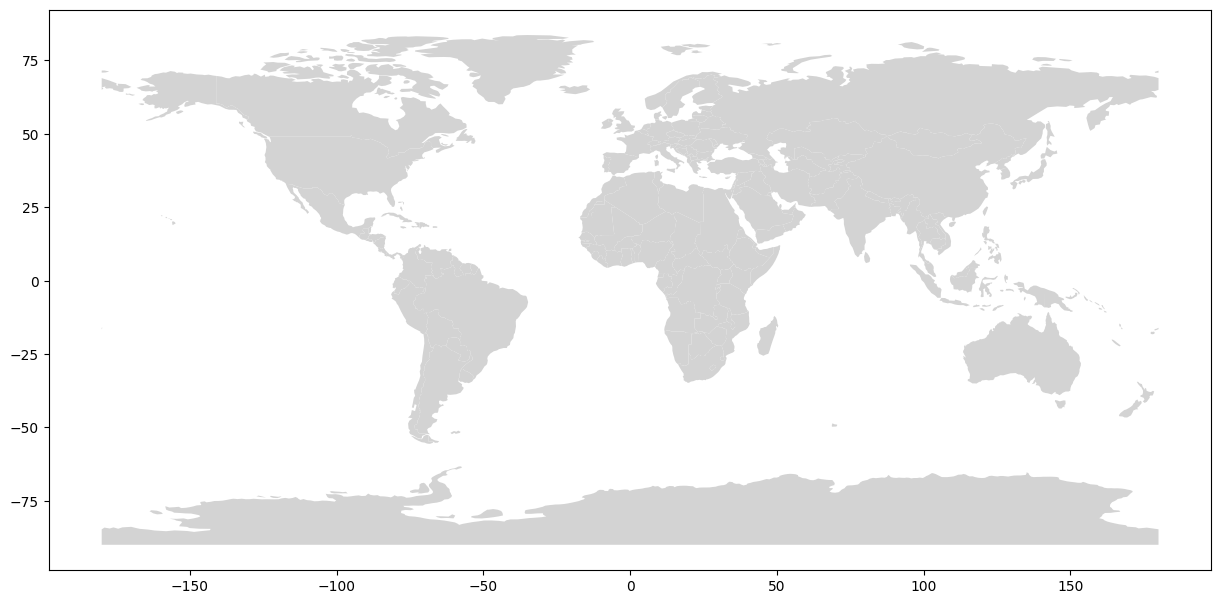

In [7]:
# Split coordinates into two columns
df[['latitude', 'longitude']] = pd.DataFrame(df['coordinates'].tolist(), index=df.index)

# Drop rows where coordinates could not be found
df.dropna(subset=['latitude', 'longitude'], inplace=True)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Plotting
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, color='red', markersize=df['Endowment']*10)  # Adjust markersize as needed
plt.show()
